# Regularization

We use a custom generated dataset for regularization to shwo the effect to regularization.

## Dataset

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Use the helper code below to generate the data

# Defines the number of data points to generate
num_points = 100

# Generate predictor points (x) between 0 and 5
x = np.linspace(0, 5, num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.cos(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Generate data of the true function y = x*sin(x) 
# x_b will be used for all predictions below 
x_b = np.linspace(0, 5, 100)
y_b = x_b * np.sin(x_b) + np.cos(x_b)

print(x_b.shape)
print(y_b.shape)

(100,)
(100,)


In [4]:
# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train = np.reshape(x_train, newshape=(-1, 1)).astype(np.float32)
x_test = np.reshape(x_test, newshape=(-1, 1)).astype(np.float32)
y_train = np.reshape(y_train, newshape=(-1, 1)).astype(np.float32)
y_test = np.reshape(y_test, newshape=(-1, 1)).astype(np.float32)


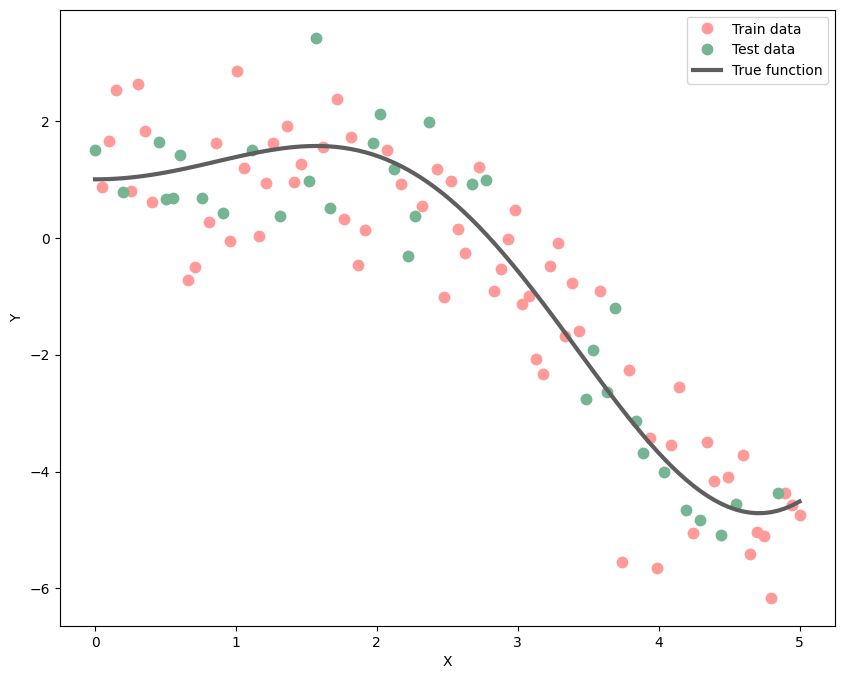

In [5]:
plt.rcParams["figure.figsize"] = (10,8)

# Plot the train data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plot the test data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Plot the true data
plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Create a neural network (sequential model)

In [6]:
# Your model code here

import torch.nn as nn

def create_model(input_size, dropout_rate = 0 ):
    model = nn.Sequential(
        nn.Linear(input_size, 100), # 1st layer
        nn.Dropout(dropout_rate),
        nn.ReLU(),
        nn.Linear(100, 100), # 2nd layer
        nn.ReLU(),
        nn.Linear(100, 100), # 3rd layer
        nn.Dropout(dropout_rate),
        nn.ReLU(),
        nn.Linear(100, 100), # 4th layer
        nn.Dropout(dropout_rate),
        nn.ReLU(), #5th layer
        nn.Linear(100,100),
        nn.Dropout(dropout_rate),
        nn.ReLU(),
        nn.Linear(100,1) #Output Layer 
    )
    return model

In [7]:
# Please use the training and evaluation methods for your model(s)

import torch
torch.manual_seed(42)
from torch.utils.data import DataLoader, TensorDataset

def train_model(
    model, optimizer, loss_fn, x_dataset, y_dataset, epochs, batch_size
):
    data_loader = DataLoader(dataset=TensorDataset(torch.as_tensor(x_dataset), torch.as_tensor(y_dataset)), batch_size=batch_size, shuffle=True)
    for epoch in range(0, epochs):
        for data in data_loader:
            x, y = data
            output = model(x)

            optimizer.zero_grad()
            loss = loss_fn(output, y)
            loss.backward()

            optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}; Loss: {loss}')
    
    return model


def eval_model(
    model, x_train, y_train, x_test
):
    x_train = torch.as_tensor(x_train)
    y_train = torch.as_tensor(y_train)

    x_test = torch.as_tensor(x_test)
    # y_test = torch.as_tensor(y_test)
    
    train_output = model(x_train).detach()
    test_output = model(x_test).detach()

    plt.rcParams["figure.figsize"] = (10,8)

    # Plot the true train data
    plt.plot(x_train, y_train, '.', label='Train true data', markersize=15, color='#000000')

    # Plot the predicted train data
    plt.plot(x_train, train_output, '.', label='Train predictions', markersize=15, color='#FF9A98')

    # Plot the test predictions
    plt.plot(x_test, test_output, '.', label='Test predictions', markersize=15, color='#75B594')

    # Plot the true data
    plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

    # Set the axes labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
        

## Initialize an unregularized network

In [8]:
# Init your model
import torch.optim as optim
import torch.nn.functional as F


# create your model
unregularized_model = create_model(x_train.shape[-1])
print(unregularized_model)


# Init the adam optimizer
optimizer = optim.Adam(params=unregularized_model.parameters(), lr=0.01 )

# Define MSE loss as loss function
loss = F.mse_loss

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Linear(in_features=100, out_features=100, bias=True)
  (6): Dropout(p=0, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Dropout(p=0, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=100, out_features=100, bias=True)
  (12): Dropout(p=0, inplace=False)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=1, bias=True)
)


### Train and evalute the model

Epoch: 0; Loss: 5.409089088439941
Epoch: 100; Loss: 0.2950918674468994
Epoch: 200; Loss: 0.8196995854377747
Epoch: 300; Loss: 1.4634398221969604
Epoch: 400; Loss: 1.131366491317749
Epoch: 500; Loss: 0.6033309698104858
Epoch: 600; Loss: 0.33009299635887146
Epoch: 700; Loss: 0.34620699286460876
Epoch: 800; Loss: 0.9471007585525513
Epoch: 900; Loss: 0.5561347007751465
Epoch: 1000; Loss: 0.3131084144115448
Epoch: 1100; Loss: 0.26815900206565857
Epoch: 1200; Loss: 0.45124551653862
Epoch: 1300; Loss: 1.9381176233291626
Epoch: 1400; Loss: 0.7912355065345764


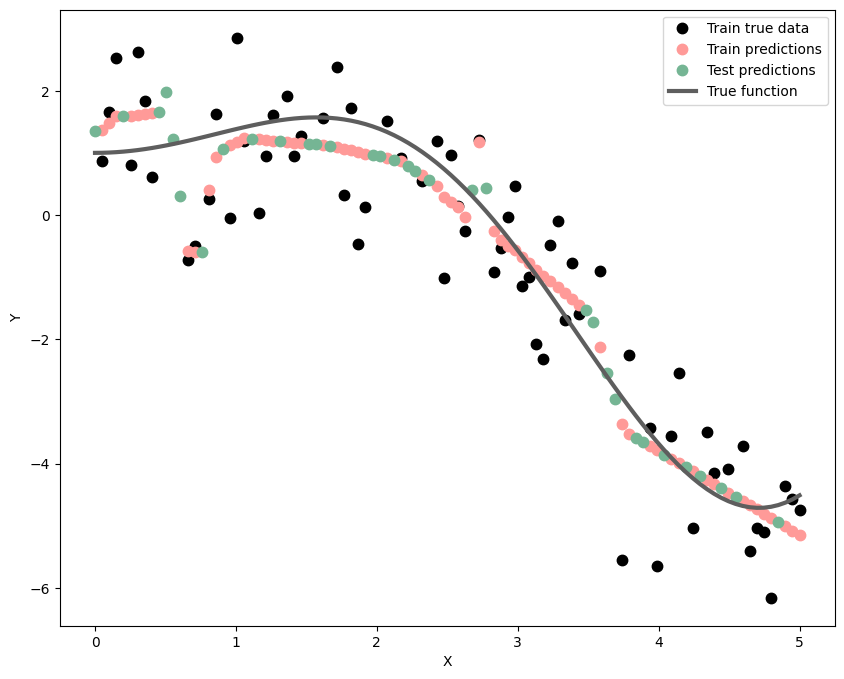

In [9]:
# use a batch size of 10
# use 1500 epochs for training



# use the train_model method to train the model
a = train_model(unregularized_model,optimizer,loss,x_train,y_train,1500,10)

# use the eval_model method to plot the results

eval_model(a,x_train,y_train,x_test)



## Initialize a neural network with dropout

In [10]:
# Init your model


import torch.optim as optim
import torch.nn.functional as F

# create your model
dropout_model = create_model(x_train.shape[-1],dropout_rate= 0.5)
print(dropout_model)

# Init the adam optimizer
optimizer = optim.Adam(params=unregularized_model.parameters(), lr=0.01 )

# Define MSE loss as loss function
loss = F.mse_loss

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Linear(in_features=100, out_features=100, bias=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Dropout(p=0.5, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=100, out_features=100, bias=True)
  (12): Dropout(p=0.5, inplace=False)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=1, bias=True)
)


### Train and evalute the model

Epoch: 0; Loss: 8.977773666381836
Epoch: 100; Loss: 6.604461669921875
Epoch: 200; Loss: 8.583081245422363
Epoch: 300; Loss: 9.02961254119873
Epoch: 400; Loss: 8.280988693237305
Epoch: 500; Loss: 4.868061542510986
Epoch: 600; Loss: 2.7628748416900635
Epoch: 700; Loss: 8.504992485046387
Epoch: 800; Loss: 2.6323840618133545
Epoch: 900; Loss: 10.57513427734375
Epoch: 1000; Loss: 5.523834228515625
Epoch: 1100; Loss: 1.5020473003387451
Epoch: 1200; Loss: 7.079730987548828
Epoch: 1300; Loss: 4.957134246826172
Epoch: 1400; Loss: 1.2292224168777466


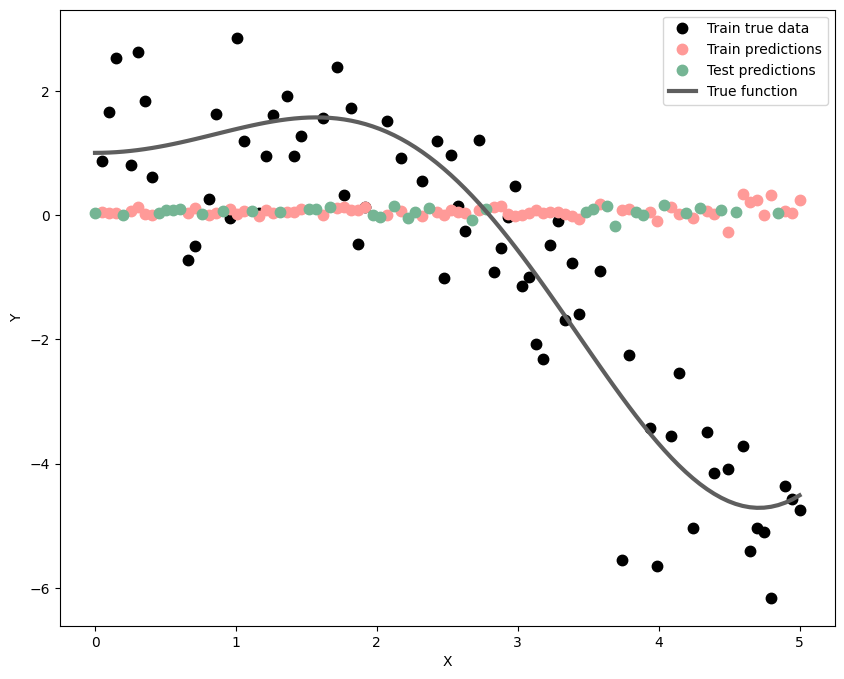

In [11]:
# use a batch size of 10
# use 1500 epochs

b = train_model(dropout_model,optimizer, loss, x_train, y_train, 1500,10)

# use the train_model method to train the model
# use the eval_model method to plot the results

eval_model(b,x_train,y_train,x_test)


## Initialize a model with L2 regularization

In [12]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F

# create your model
l2_model = create_model(x_train.shape[-1])
print(l2_model)

# Init the adam optimizer

optimizer = optim.Adam(l2_model.parameters(),lr=0.01,weight_decay=0.5)
    # L2 regularization can be implemented by a parameter of the optimizer (no need to do it manually)
# Define MSE loss as loss function

loss = F.mse_loss

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Linear(in_features=100, out_features=100, bias=True)
  (6): Dropout(p=0, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Dropout(p=0, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=100, out_features=100, bias=True)
  (12): Dropout(p=0, inplace=False)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=1, bias=True)
)


### Train and evaluate the model

Epoch: 0; Loss: 1.1925264596939087
Epoch: 100; Loss: 1.0430254936218262
Epoch: 200; Loss: 1.096097707748413
Epoch: 300; Loss: 0.7486592531204224
Epoch: 400; Loss: 1.903943419456482
Epoch: 500; Loss: 1.547249436378479
Epoch: 600; Loss: 1.2543591260910034
Epoch: 700; Loss: 1.390303373336792
Epoch: 800; Loss: 1.0289300680160522
Epoch: 900; Loss: 2.5028369426727295
Epoch: 1000; Loss: 2.3206944465637207
Epoch: 1100; Loss: 2.1675543785095215
Epoch: 1200; Loss: 1.0552611351013184
Epoch: 1300; Loss: 2.159186840057373
Epoch: 1400; Loss: 0.7430263161659241


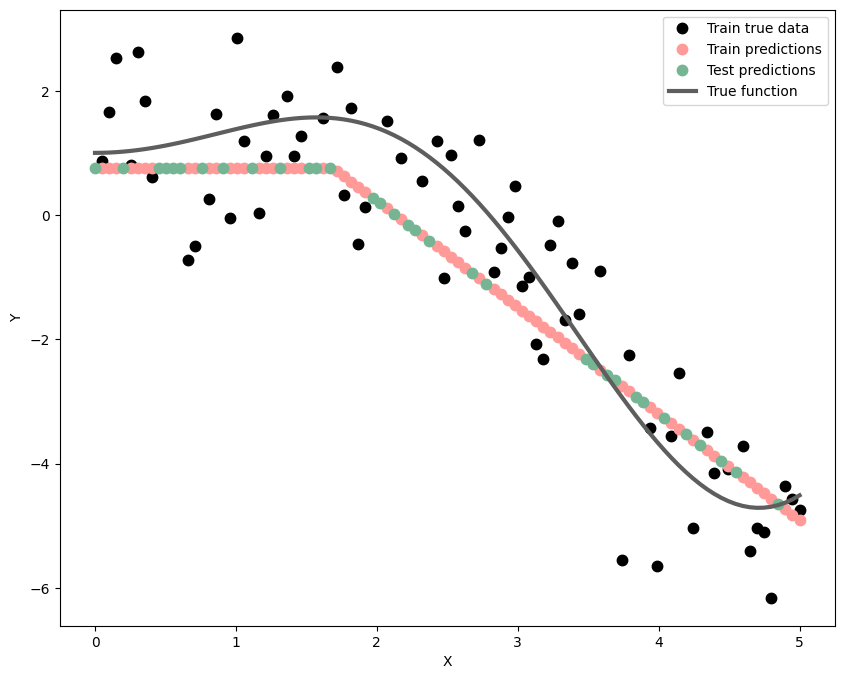

In [13]:
# use a batch size of 10
# use 1500 epochs

l2 = train_model(l2_model,optimizer,loss,x_train,y_train,1500,10)

eval_model(l2,x_train,y_train,x_test)

# use the train_model method to train the model
# use the eval_model method to plot the results



## Initialize a model with L1 regularization

In [14]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F

# create your model
l1_model = create_model(x_train.shape[-1])
print(l1_model)


# Init the adam optimizer
    # L1 regularization has to be implemented manually. There is no pre-defined function to use.
optimizer = optim.Adam(l1_model.parameters(),lr = 0.01)

def loss_l1(prediction, target):
    mse = F.mse_loss(prediction,target)
    l1_lambda = 0.05
    sum = 0 
    for i in l1_model.parameters():
        sum = sum + i.sum()
    if sum >= 0:
        result = mse + l1_lambda * sum
    else:
        result = mse - l1_lambda * sum
    return result

# Define MSE loss as loss function and add the l1 regularization
    # You have to access all the weights from the network (see previous practicals on how to do this)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Linear(in_features=100, out_features=100, bias=True)
  (6): Dropout(p=0, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Dropout(p=0, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=100, out_features=100, bias=True)
  (12): Dropout(p=0, inplace=False)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=1, bias=True)
)


### Train and evaluate the model

Epoch: 0; Loss: 25.677490234375
Epoch: 100; Loss: 1.8231587409973145
Epoch: 200; Loss: 4.437682151794434
Epoch: 300; Loss: 3.723294973373413
Epoch: 400; Loss: 2.194042921066284
Epoch: 500; Loss: 3.1232168674468994
Epoch: 600; Loss: 2.331052780151367
Epoch: 700; Loss: 1.4605060815811157
Epoch: 800; Loss: 2.1638622283935547
Epoch: 900; Loss: 4.336031913757324
Epoch: 1000; Loss: 5.244297981262207
Epoch: 1100; Loss: 0.9316393136978149
Epoch: 1200; Loss: 3.506175994873047
Epoch: 1300; Loss: 1.3375530242919922
Epoch: 1400; Loss: 6.069616317749023


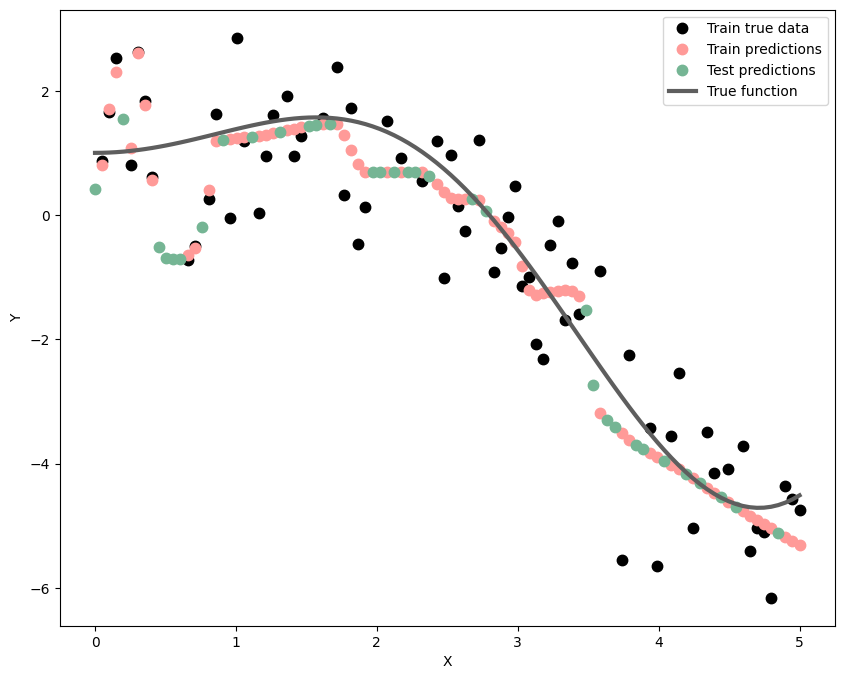

In [15]:
# use a batch size of 10
# use 1500 epochs

l1train = train_model(l1_model,optimizer,loss_l1,x_train,y_train,1500,10)

eval_model(l1train,x_train,y_train,x_test)

# use the train_model method to train the model
# use the eval_model method to plot the results

